In [11]:
%matplotlib notebook
import os, glob
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import re
import pandas as pd
def read_gdat(file):
    """Read tabular data from BNG gdat or cdat or similar file. Data needs to be 
       whitespace delimited and first line of file contains whitespace delimited
       column names.
    Args:
        file: Text file containing the data.
    Raises:
    Returns:
        gdat: DataFrame containing the data from the file with column names matching 
        the columns of the input file.
    """
    f=open(file)
    # Get column names from first line of file
    line=f.readline()
    names=re.split('\s+',(re.sub('#','',line)).strip())
    gdat= pd.read_table(f,sep='\s+',header=None,names=names)
    f.close
    return(gdat)

In [14]:
# Enter the folder where the gdat file/files are in
rb_folder = '/home/cellmod/RuleBender-workspace00/test/results/organelle_transport/'
# Let's switch to that folder so we don't have to feed in absolute paths all the time
os.chdir(rb_folder)
# Get the list of gdat files in each folder
glob_str = '**/*.gdat'
files_to_load = [fname for fname in glob.iglob(glob_str, recursive=True)]
# Load in each file using the function defined above
loaded_gdats = list(map(read_gdat, files_to_load))
# Check if we have more than 1 file, if so merge the pandas data frames together
# Note: This seems to change the column names, please print the data frame and check the names
all_df = pd.concat(loaded_gdats, axis=1)

/home0/shared/cellmod/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: read_table is deprecated, use read_csv instead.


In [15]:
# We can take a look at the column names
all_df.head()

,time,A,B,C,D,time,A,B,C,D,...,time,A,B,C,D,time,A,B,C,D
0,0.00000,1200.0,1000.0,0.0,0.0,0.00000,1200.0,1000.0,0.0,0.0,...,0.00000,1200.0,1000.0,0.0,0.0,0.00000,1200.0,1000.0,0.0,0.0
1,0.00001,1196.0,1000.0,0.0,0.0,0.00001,1197.0,1000.0,0.0,0.0,...,0.00001,1199.0,1000.0,0.0,0.0,0.00001,1198.0,1000.0,0.0,0.0
2,0.00002,1196.0,999.0,1.0,0.0,0.00002,1196.0,1000.0,0.0,0.0,...,0.00002,1199.0,999.0,1.0,0.0,0.00002,1196.0,1000.0,0.0,0.0
3,0.00003,1194.0,998.0,1.0,0.0,0.00003,1194.0,999.0,1.0,0.0,...,0.00003,1197.0,998.0,2.0,0.0,0.00003,1197.0,999.0,1.0,0.0
4,0.00004,1194.0,996.0,3.0,0.0,0.00004,1194.0,998.0,2.0,0.0,...,0.00004,1195.0,998.0,2.0,0.0,0.00004,1195.0,997.0,3.0,0.0


In [16]:
all_df.reset_index()
time_series = all_df.pop("time")

<IPython.core.display.Javascript object>


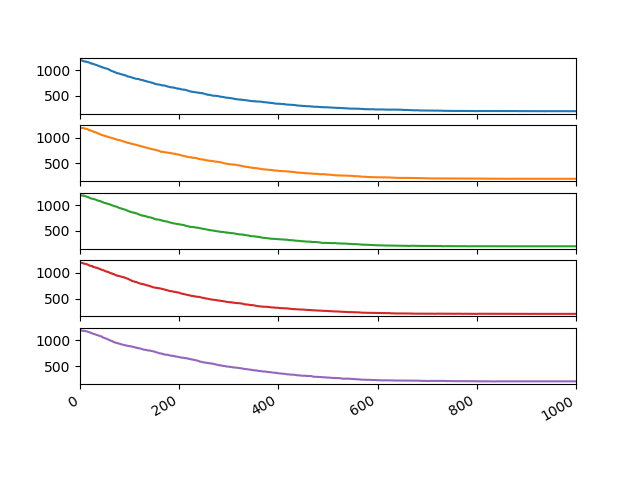

In [17]:
# This will plot each time series in separate plots, this might get 
# unreadble if you have too many time series
axs = all_df.filter(like="A").plot.line(subplots=True, legend=False)

# Note, please press the stop interactivity button once you run this 
# if you want to plot anything after

<IPython.core.display.Javascript object>


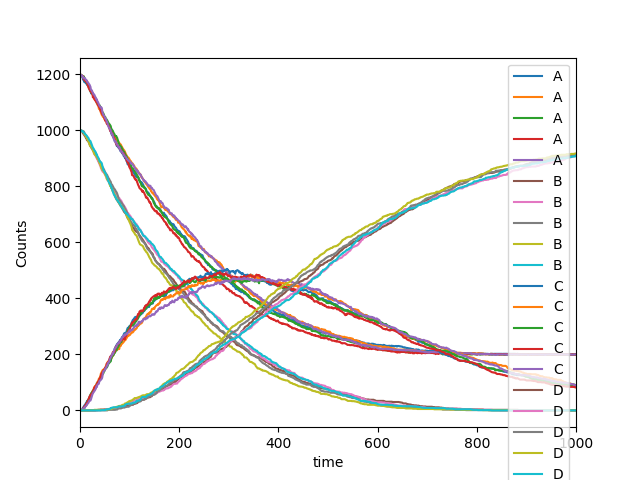

In [18]:
# And filter out certain data and plot all of them in a single plot
ax = all_df[["A","B","C","D"]].plot(legend=True)
ax.set_xlabel("time")
_ = ax.set_ylabel("Counts")

         time     time     time     time     time
0     0.00000  0.00000  0.00000  0.00000  0.00000
1     0.00001  0.00001  0.00001  0.00001  0.00001
2     0.00002  0.00002  0.00002  0.00002  0.00002
3     0.00003  0.00003  0.00003  0.00003  0.00003
4     0.00004  0.00004  0.00004  0.00004  0.00004
5     0.00005  0.00005  0.00005  0.00005  0.00005
6     0.00006  0.00006  0.00006  0.00006  0.00006
7     0.00007  0.00007  0.00007  0.00007  0.00007
8     0.00008  0.00008  0.00008  0.00008  0.00008
9     0.00009  0.00009  0.00009  0.00009  0.00009
10    0.00010  0.00010  0.00010  0.00010  0.00010
11    0.00011  0.00011  0.00011  0.00011  0.00011
12    0.00012  0.00012  0.00012  0.00012  0.00012
13    0.00013  0.00013  0.00013  0.00013  0.00013
14    0.00014  0.00014  0.00014  0.00014  0.00014
15    0.00015  0.00015  0.00015  0.00015  0.00015
16    0.00016  0.00016  0.00016  0.00016  0.00016
17    0.00017  0.00017  0.00017  0.00017  0.00017
18    0.00018  0.00018  0.00018  0.00018  0.00018


<IPython.core.display.Javascript object>


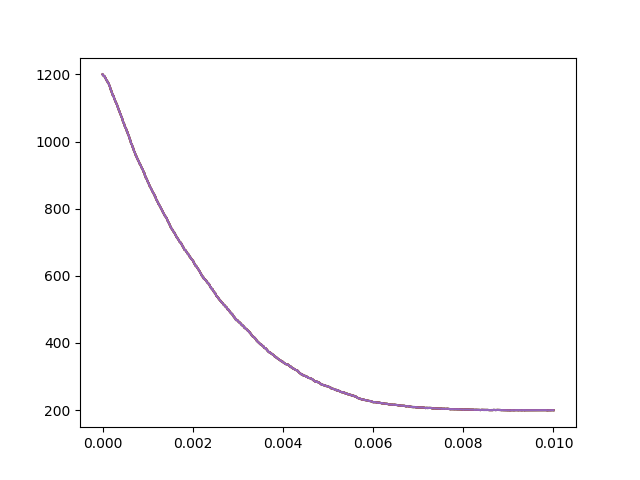

ValueError: Input passed into argument "'x'"is not 1-dimensional.

In [26]:
# We can also use matplotlib on it's own to get more specific plots
# here we are plotting the mean of a subset of our data and then 
# shading the +- standard deviation region

# First calculate these values and put them into arrays
a_mean = all_df.filter(like="A").mean(axis=1)
a_std = all_df.filter(like="A").std(axis=1)
print(time_series)
# Now we use matplotlib on its own
plt.plot(, a_mean)
plt.fill_between(time_series, a_mean+a_std, a_mean-a_std, alpha=0.5)
plt.xlabel("time")
_ = plt.ylabel("A Counts")

<IPython.core.display.Javascript object>


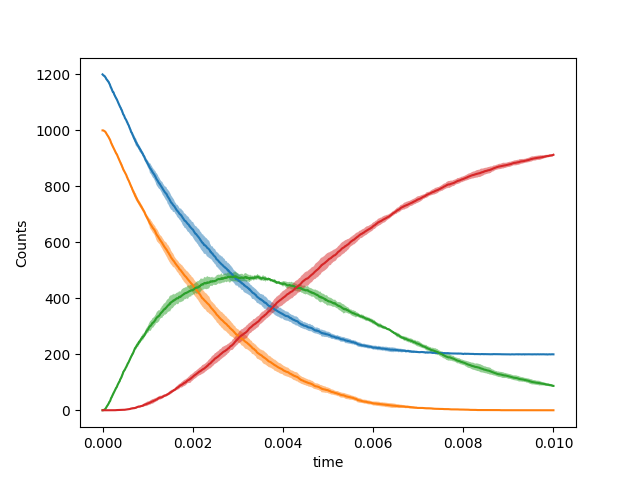

In [38]:
# Let's repeat for all series

# First calculate these values and put them into arrays
b_mean = all_df.filter(like="B").mean(axis=1)
b_std = all_df.filter(like="B").std(axis=1)
c_mean = all_df.filter(like="C").mean(axis=1)
c_std = all_df.filter(like="C").std(axis=1)
d_mean = all_df.filter(like="D").mean(axis=1)
d_std = all_df.filter(like="D").std(axis=1)

# Now we use matplotlib on its own
plt.plot(all_df.time, a_mean)
plt.fill_between(all_df.time, a_mean+a_std, a_mean-a_std, alpha=0.5)
plt.plot(all_df.time, b_mean)
plt.fill_between(all_df.time, b_mean+b_std, b_mean-b_std, alpha=0.5)
plt.plot(all_df.time, c_mean)
plt.fill_between(all_df.time, c_mean+c_std, c_mean-c_std, alpha=0.5)
plt.plot(all_df.time, d_mean)
plt.fill_between(all_df.time, d_mean+d_std, d_mean-d_std, alpha=0.5)
plt.xlabel("time")
_ = plt.ylabel("Counts")

<IPython.core.display.Javascript object>


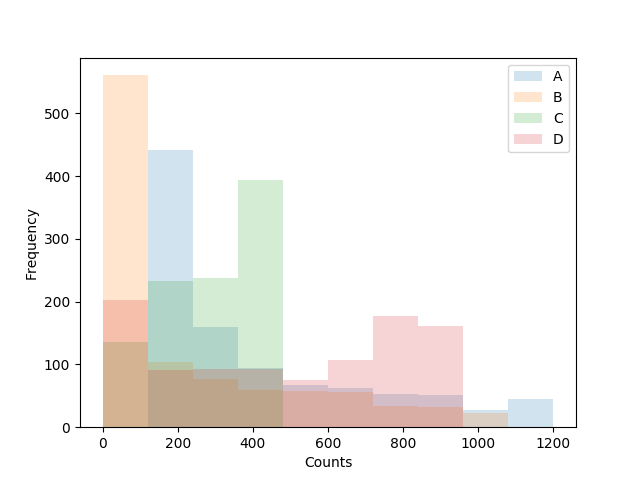

In [43]:
# Pandas still contain many interesting ways to visualize the data
ax = all_df[["A","B","C","D"]].plot.hist(alpha=0.2)
ax.set_xlabel("Counts")
_ = ax.set_ylabel("Frequency")

In [13]:
# Now work with MCell data, taken mostly from here: 
# https://github.com/mcellteam/Workshop_2018/blob/master/plotting/MCell_Organelle_MultiIndex.ipynb
mcell_data_path = "C:\\Users\\Akhlore\\Dropbox\\Faeder_lab\\Workshop2019\\mcell_dat"
os.chdir(mcell_data_path)
fold_list = os.listdir(os.getcwd())
# Filter out everything except files ending in '.gdat'
rxndata_fnames = sorted(list(filter(lambda x: x.endswith(".dat"), fold_list)))
rxndata_fnames.sort()

df_list = []
for fname in rxndata_fnames:
    spec_loc_name = fname.replace('.','_')
    df = pd.read_csv(fname, names=['time', "{}".format(spec_loc_name)], delim_whitespace=True)
    df = df.set_index('time')
    df_list.append(df)
    
# Turn all the dataframes into a single dataframe
df_rxndata = pd.concat(df_list, axis=1)
df_rxndata.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Akhlore\\Dropbox\\Faeder_lab\\Workshop2019\\mcell_dat'

<IPython.core.display.Javascript object>


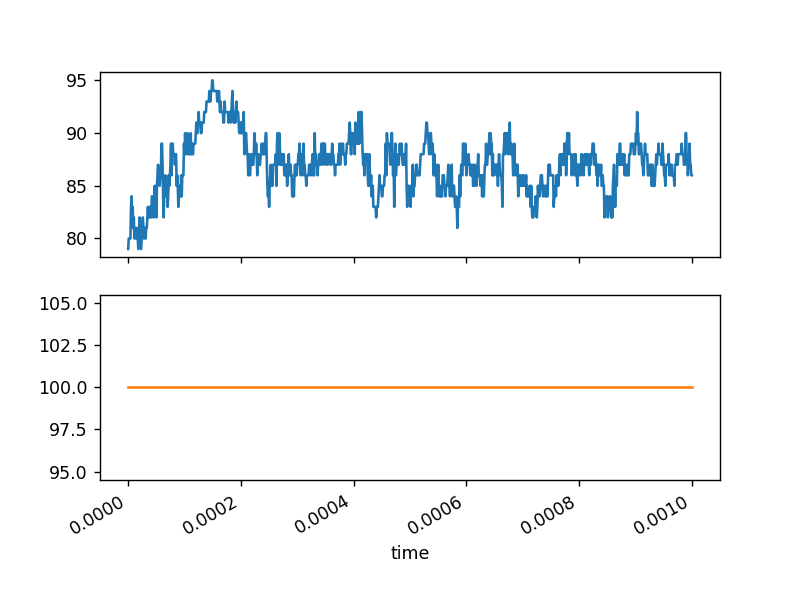

In [23]:
# Now we have the MCell data in the same format, we can compare the results the same way
axs = df_rxndata.filter(like="dat").plot.line(subplots=True, legend=False)

<IPython.core.display.Javascript object>


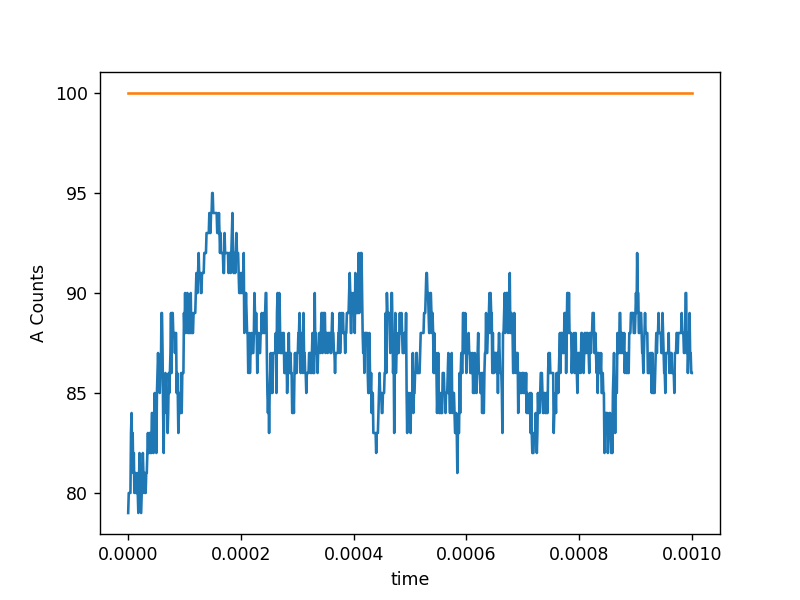

In [25]:
# And filter out certain data and plot all of them in a single plot
ax = df_rxndata.filter(like="dat").plot(legend=False)
ax.set_xlabel("time")
_ = ax.set_ylabel("A Counts")